In [7]:
import glob,h5py
import numpy as np
import pyperplot as ppp
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import scipy
import settings
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage
aa=np.asarray
mk=ppp.Marker('fig.yml')
figs_folder='figs/sim/'


In [8]:
ss=h5py.File("VUE/res_sim/kiani_structure.jld","r")
rr=h5py.File("VUE/res_sim/kiani_result.jld","r")

# Figure 6A

figure used in paper is stored in paper_figs/fig6/A.svg


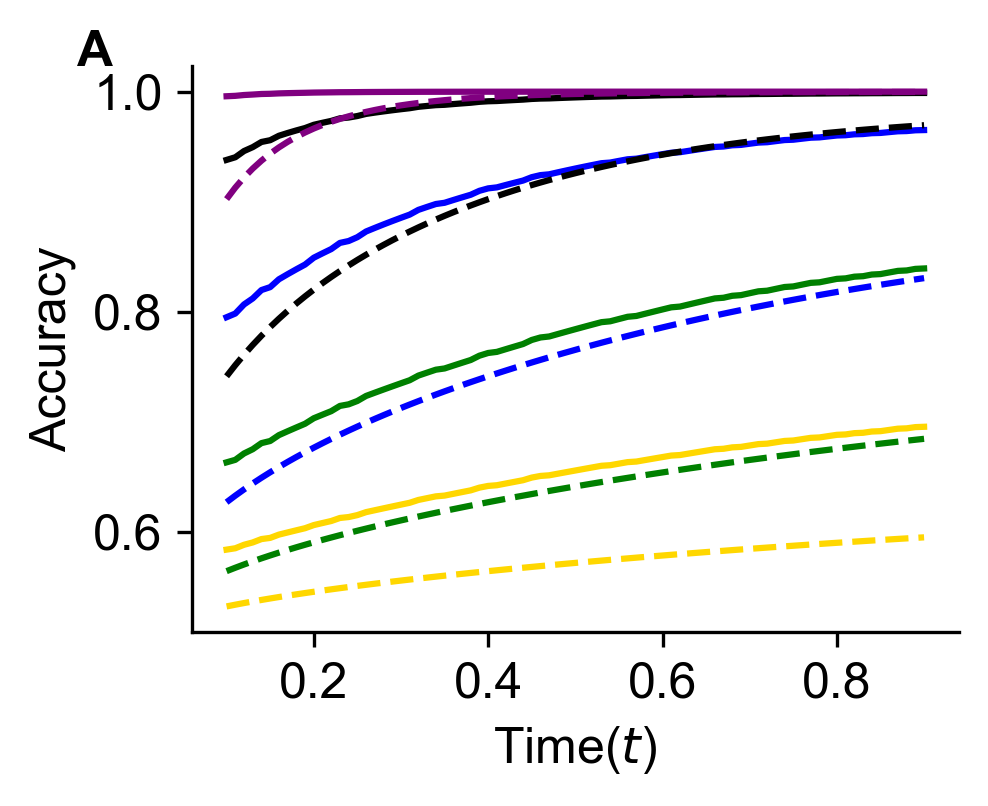

In [9]:
cs=["red","gold","green","blue","black", "purple"]
with ppp.SF('Kiani_Acc',figs_folder,mk) as (fig,axes):
    axes.set_prop_cycle(cycler('color',cs[1:]))
    axes.plot(rr["fix_RTs"][()],rr["prop_correct"][()][:,1:])
    axes.plot(rr["fix_RTs"][()],rr["prop_std_correct"][()][:,1:],"--")
    axes.set(xlabel='Time($t$)',ylabel='Accuracy')

# Figure 6B

figure used in paper is stored in paper_figs/fig6/B.svg


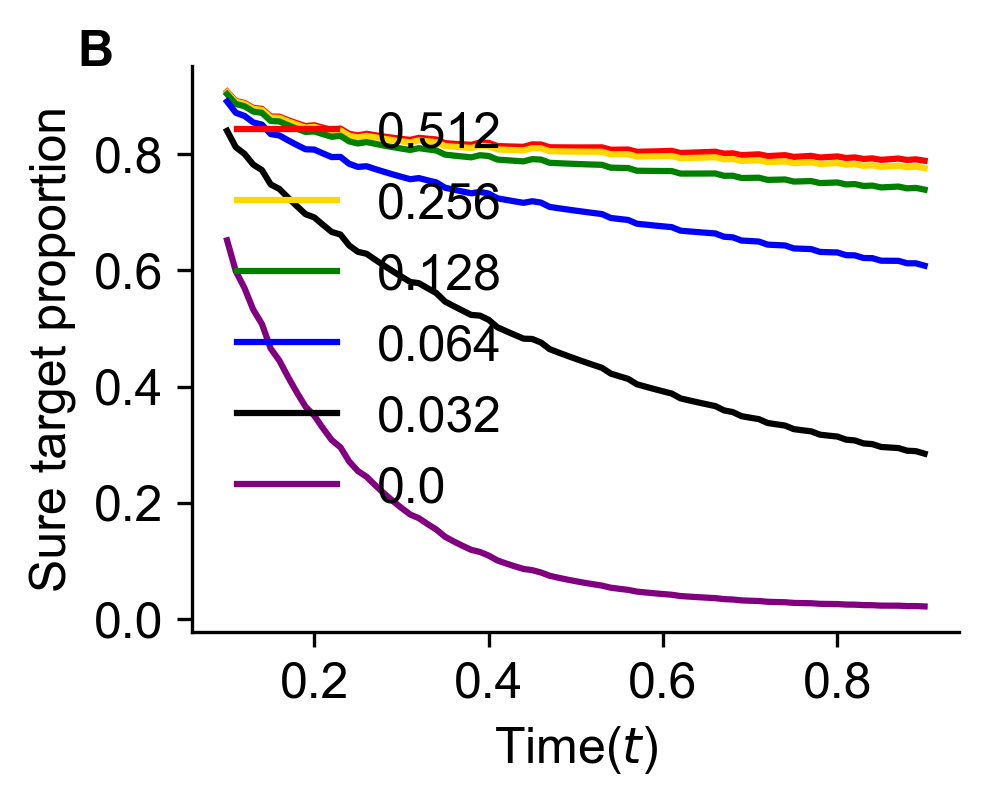

In [10]:
with ppp.SF('Kiani_UR',figs_folder,mk) as (fig,axes):
    axes.set_prop_cycle(cycler('color',cs))
    axes.plot(rr["fix_RTs"][()],rr["prop_ur"][()])
    axes.set(xlabel='Time($t$)',ylabel='Sure target proportion')
    axes.legend(["0.512","0.256","0.128","0.064","0.032","0.0"])

# Figure 6C

In [11]:
colors = ["blue","lightblue","orange","grey"]
cmap = mpl.colors.ListedColormap(colors,"", len(colors))
Dcf_kwargs={'cmap':cmap,'rasterized':True}
Daxes_kwargs={'xlabel':'Time($t$)','ylabel':'Evidence($x$)'}

figure used in paper is stored in paper_figs/fig6/C.svg


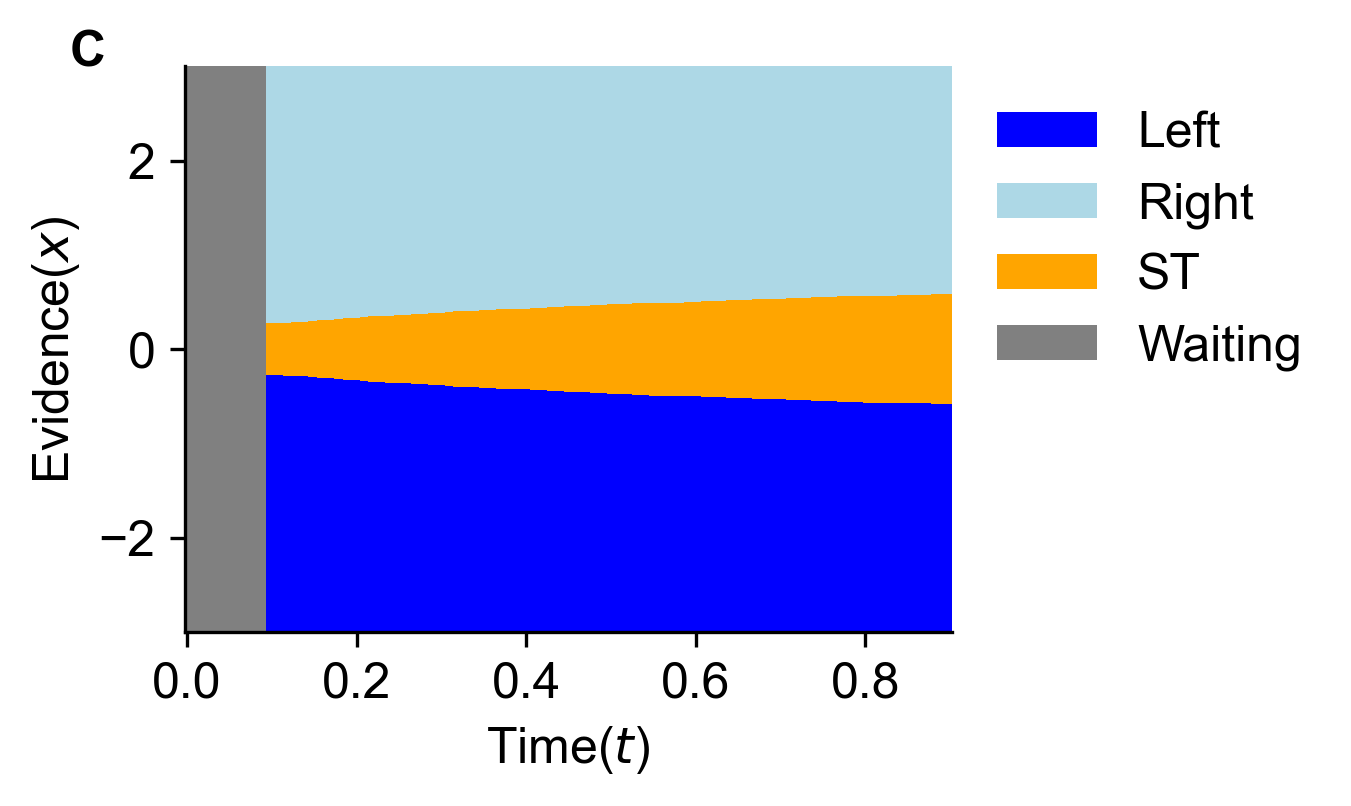

In [12]:
Dfix=ss["DUR_fix_ex"][()].T-1.

def get_xxyy(xr,yr,D):
    return np.linspace(xr[0],xr[1],D.shape[1]),np.linspace(yr[0],yr[1],D.shape[0])
with ppp.SF('Kiani_Dfix',figs_folder,mk) as (fig,axes):
    cf=axes.pcolormesh(*get_xxyy([0,0.9],[-3,3],Dfix),Dfix,**Dcf_kwargs)
    proxy=[plt.Rectangle((0,0),1,1,fc = pc) 
        for i,pc in enumerate(cf.cmap.colors)]
    axes.legend(proxy, ['Left', 'Right','ST','Waiting'],bbox_to_anchor=(1,1))
    axes.set(**Daxes_kwargs)

figure used in paper is stored in paper_figs/fig6/D.svg


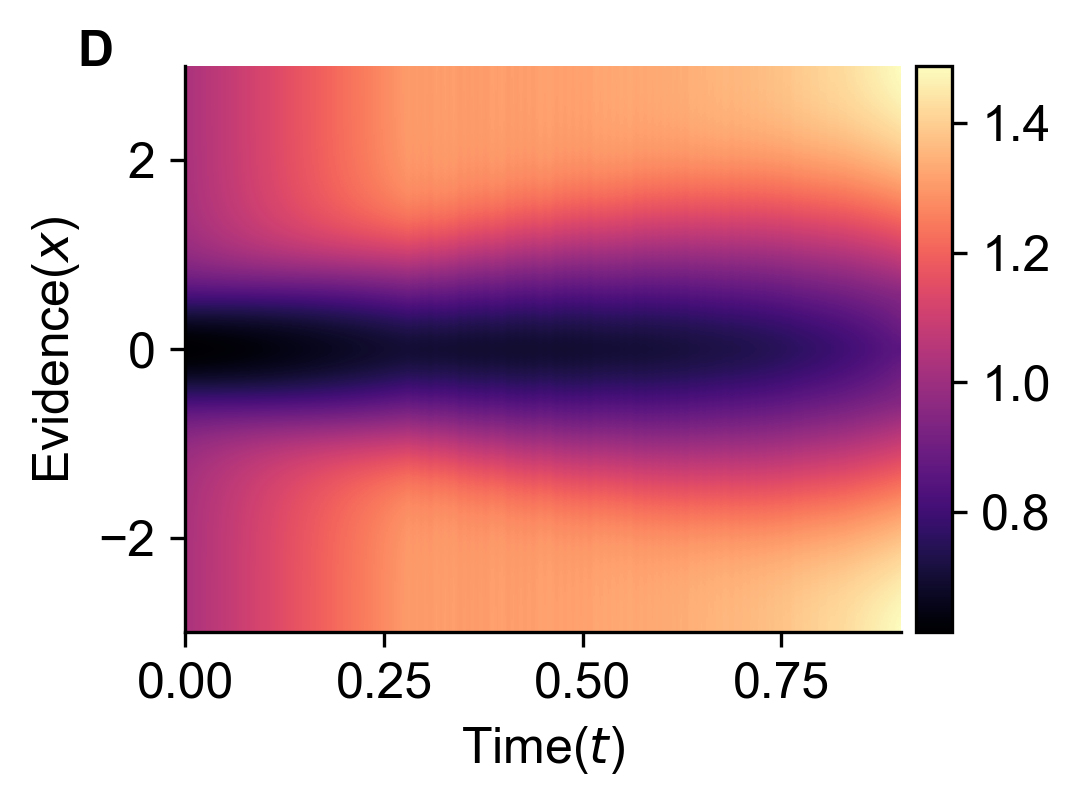

In [13]:
def noinfmin(V):
    V=aa(V)
    V[V==-np.inf]=np.nan
    return np.nanmin(V)
def Vcf_kwargs(vmin,vmax):
    return {'vmin':vmin,'vmax':vmax,'cmap':mpl.cm.magma,'rasterized':True}
Vaxes_kwargs={'xlabel':'Time($t$)','ylabel':'Evidence($x$)'}
titles=['Value Function','Probability of Choosing Left','Expected Value Function']

with ppp.SF('Kiani_V',figs_folder,mk) as (fig,axes):
    V=ss["V"][()].T
    V_smooth=ndimage.zoom(V, 3)
    cf=axes.pcolormesh(*get_xxyy([0,0.9],[-3,3],V_smooth),V_smooth,**Vcf_kwargs(noinfmin(V_smooth),np.max(V_smooth)))
    axes.set(**Vaxes_kwargs)
    divider = make_axes_locatable(axes)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cf,cax=cax)